In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/shrut/Downloads/uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
#Handling missing values
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df.pickup_datetime = pd.to_datetime(df['pickup_datetime'])

In [9]:
df['hour'] = df['pickup_datetime'].dt.hour
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek

In [10]:
#Calculate distance using eucledian formula
df['distance'] = ((df.dropoff_longitude - df.pickup_longitude)**2 + (df.dropoff_latitude - df.pickup_latitude)**2)*0.5

In [11]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,dayofweek,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,0.000115
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,0.000244
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,0.001410
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,0.000137
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,0.001302


In [12]:
#Removing outliers
df = df[(df['distance'] > 0.01) & (df['fare_amount'] > 0)]
print(f"\nData shape after cleaning: {df.shape}")


Data shape after cleaning: (6196, 12)


In [13]:
df.shape

(6196, 12)

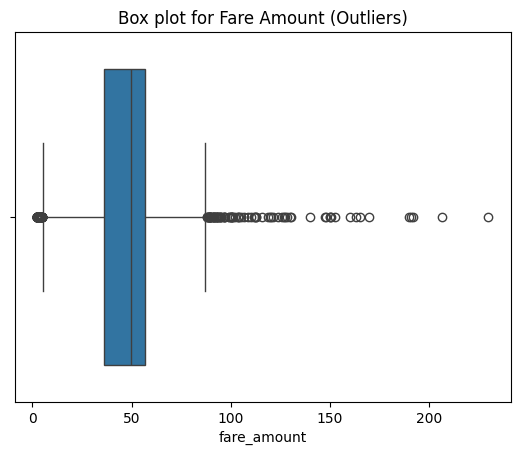

In [19]:
#Boxplot for fare amount
sns.boxplot(x=df['fare_amount'])
plt.title("Box plot for Fare Amount (Outliers)")
plt.show()

In [21]:
#correlation heatmap
corr = df[['fare_amount','distance','passenger_count','hour','dayofweek']].corr()
print(corr)

                 fare_amount  distance  passenger_count      hour  dayofweek
fare_amount         1.000000 -0.049428         0.003153 -0.002648   0.023158
distance           -0.049428  1.000000        -0.010034 -0.017346   0.005266
passenger_count     0.003153 -0.010034         1.000000  0.010305   0.025906
hour               -0.002648 -0.017346         0.010305  1.000000  -0.049855
dayofweek           0.023158  0.005266         0.025906 -0.049855   1.000000


<Axes: >

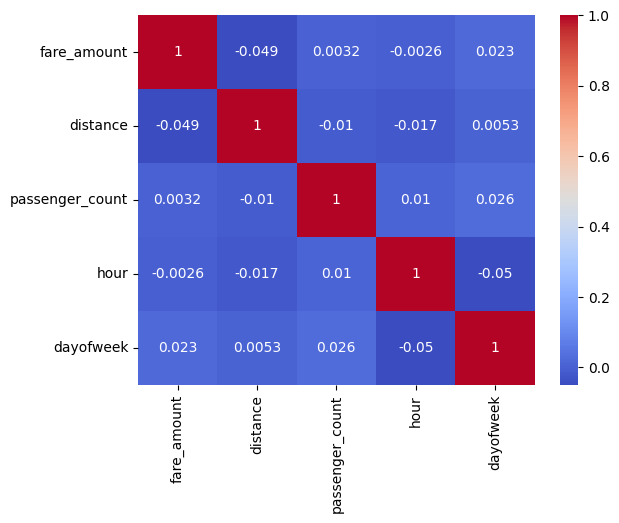

In [23]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [25]:
#Model preparation
x = df[['distance','passenger_count','hour','dayofweek']]
y = df['fare_amount']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
#Linear regression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_predict_lr = lr.predict(xtest)
print(lr.coef_)
print(lr.intercept_)

[-0.0002904  -0.06547813 -0.00538849  0.18328587]
44.83873597920119


In [36]:
#Random Forest 
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(xtrain,ytrain)
y_predict_rf = rf.predict(xtest)

In [38]:
def evaluate(y_true,y_predict,model_name):
    rmse = np.sqrt(mean_squared_error(y_true,y_predict))
    r2 = r2_score(y_true,y_predict)
    print(model_name," RMSE: ",rmse," R2 score: ",r2_score)

evaluate(ytest,y_predict_lr,"Linear Regression")
evaluate(ytest,y_predict_rf,"Random Forest")

Linear Regression  RMSE:  34.6654081023098  R2 score:  -2.8467917217698044
Random Forest  RMSE:  14.30560802825016  R2 score:  0.3448832846719927
